In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [3]:
df=pd.read_excel("scaled_breast_cancer.xls")

In [4]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,2.204465,-0.282612,2.068351,2.454131,-0.806833,-0.392414,0.206957,0.826142,0.154835,-0.922288,...,-0.307819,1.938870,2.509421,-0.333961,-0.355468,0.004135,1.365129,-0.177083,0.524615,0
1,1.914972,0.595678,1.928754,2.024982,1.134031,1.588118,1.999878,2.601498,1.260931,-0.323008,...,0.066720,1.716129,1.963460,0.644786,1.540072,1.226375,2.345448,1.561970,0.424590,0
2,2.112354,-1.148284,2.174252,2.352950,0.407963,0.927616,2.009614,1.875733,0.141923,-0.532395,...,-1.498573,1.705522,1.667270,0.312202,-0.208860,0.931351,0.960963,-0.954921,-0.325600,0
3,-0.466770,-0.805044,-0.354381,-0.507699,2.554936,1.834284,1.357347,1.155812,1.338400,2.590363,...,-0.247752,-0.019839,-0.174851,2.293453,2.340040,1.724519,1.160466,2.311596,2.982183,0
4,1.441255,0.275153,1.428130,1.456271,-0.034703,0.347544,0.625576,0.943925,0.077365,-0.786909,...,0.443027,1.740878,1.735792,0.635284,0.210246,0.804913,1.488959,0.453651,0.153688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.059582,2.084735,0.069705,-0.077503,0.329111,0.435286,-0.479058,-0.008180,-1.028730,-0.012537,...,1.416477,-0.132977,-0.251993,-0.319708,-0.038349,-0.633912,-0.031395,-1.184645,0.121041,1
491,2.319605,1.564827,2.554534,2.527401,1.157452,3.140665,3.946942,3.201176,1.605240,1.265447,...,0.752199,2.656592,2.206600,0.468992,1.493062,2.452712,2.538072,0.183625,1.199092,0
492,2.530145,0.883394,2.506397,2.987952,1.243331,0.515716,2.754365,2.939778,-0.215298,-1.001711,...,0.220423,2.196967,2.666357,0.483245,-0.158663,0.993985,1.977398,-1.567518,-0.716672,0
493,2.059719,2.362355,1.986518,2.227345,0.212784,0.211056,1.133435,1.679223,-0.103397,-1.164167,...,2.313958,1.804519,2.012088,-0.676048,-0.310848,0.471840,0.966122,-0.535775,-1.048700,0


In [6]:
#Turn dataframe into values
df_array=df.drop(columns='diagnosis').values

In [7]:
df_array

array([[ 2.20446536, -0.28261218,  2.06835079, ...,  1.36512913,
        -0.17708262,  0.52461532],
       [ 1.91497191,  0.5956785 ,  1.92875368, ...,  2.34544773,
         1.56196975,  0.42458997],
       [ 2.11235381, -1.14828374,  2.17425205, ...,  0.9609627 ,
        -0.95492065, -0.32560022],
       ...,
       [ 2.53014549,  0.88339441,  2.50639691, ...,  1.97739829,
        -1.56751847, -0.71667159],
       [ 2.05971864,  2.36235515,  1.986518  , ...,  0.96612227,
        -0.53577477, -1.04870021],
       [ 0.89845514,  2.31945015,  0.88418216, ...,  0.60495226,
        -1.24912881, -0.22696411]])

## Splitting the dataset

Ratio 0.75:0.25, train: test

In [8]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(df_array,df.diagnosis,test_size=0.25,random_state=5)

## Import all the learning algorithms we want to test

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Prepare an array with all the algorithms

In [30]:
models = []
models.append(('LR',LogisticRegression(solver='saga',multi_class='multinomial')))
models.append(('KNN',KNeighborsClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

## Import some utilities of sklearn to compare algorithms

In [31]:
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [32]:
# Prepare the configuration to run the test
results=[]
names=[]
seed=7

## Evaluate each model in turn and save the performance result

In [33]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(+/-%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

LR:0.967639(+/-0.023579)
KNN:0.943314(+/-0.022545)
LDA:0.946088(+/-0.024177)
NB:0.935206(+/-0.038673)
SVM:0.970270(+/-0.025497)


C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

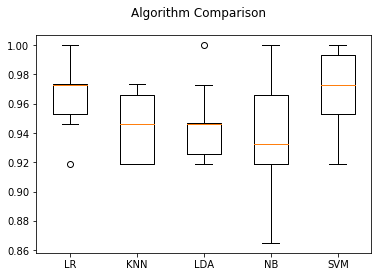

In [34]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SVM best perfomed

## ROC CURVE FOR COMPARISON

In [37]:
#Define x and y axis
x = df.drop(axis = 'columns', columns = 'diagnosis')
y = np.array(wine_df['diagnosis'])

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

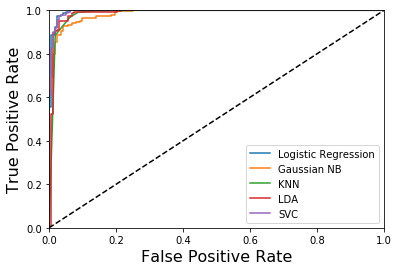

<Figure size 720x432 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

In [38]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)
y_score_lr = cross_val_predict(lr, x, y, method='decision_function',cv=10)

fpr, tpr, threshold = roc_curve(y,y_score_lr)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnbc = GaussianNB()
gnbc.fit(x,y)
gnbc_results = cross_val_score(gnbc,x,y,scoring='accuracy')
y_score_gnb = cross_val_predict(gnbc,x,y,method='predict_proba',cv=10)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y,y_score_gnb[:,1])

# K Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x,y)
knc_results = cross_val_score(knc,x,y,scoring='accuracy')
y_score_knn = cross_val_predict(knc,x,y,method='predict_proba',cv=10)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y,y_score_knn[:,1])

# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x,y)
lda_results = cross_val_score(lda,x,y,scoring='accuracy')
y_score_lda = cross_val_predict(lda,x,y,method='predict_proba',cv=10)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y,y_score_lda[:,1])

# SVC
from sklearn.svm import SVC
svc = SVC(probability = True)
svc.fit(x,y)
svc_results = cross_val_score(svc,x,y,scoring='accuracy')
y_score_svc = cross_val_predict(svc,x,y,method='predict_proba',cv=10)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y,y_score_svc[:,1])

# ROC Curve for the models above
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot(fpr_gnb, tpr_gnb,label='Gaussian NB')
plt.plot(fpr_knn, tpr_knn,label='KNN')
plt.plot(fpr_lda, tpr_lda,label='LDA')
plt.plot(fpr_svc, tpr_svc,label='SVC')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(10, 6))
plt.show()
plt.show



In [39]:
#AUC
from sklearn.metrics import roc_auc_score
print ('AUC of Logistic Regression:',roc_auc_score(y,y_score_lr))
print ('AUC of GaussianNB:',roc_auc_score(y,y_score_gnb[:,1]))
print ('AUC of KNeighborsClassifier:',roc_auc_score(y,y_score_knn[:,1]))
print ('AUC of Linear Discriminant Analysis:',roc_auc_score(y,y_score_lda[:,1]))
print ('AUC of Support Vector Machine:',roc_auc_score(y,y_score_svc[:,1]))

AUC of Logistic Regression: 0.9947889718382734
AUC of GaussianNB: 0.9853278143247838
AUC of KNeighborsClassifier: 0.9855865178505433
AUC of Linear Discriminant Analysis: 0.9866767684233868
AUC of Support Vector Machine: 0.9946596200753937


## Building best model

SVM is the best model according to accuracy scoring

LR, SVM are relatively similar in terms of AUC

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'probability':[True],
    'random_state': [5,10,25,50,100],
    'C': [i for i in range(1,101,20)]
}

model_svm = SVC()

grid_search = GridSearchCV(
    model_svm, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, Y_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 21, 41, 61, 81],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True],
                         'random_state': [5, 10, 25, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [59]:
print("The best score for this model is",grid_search.best_score_)

The best score for this model is 0.9730458221024259


In [60]:
svm = grid_search.best_estimator_

In [61]:
# Use the whole dataset to train the model
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test, axis=0)

In [62]:
# Train the model
svm.fit(X, Y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=5, shrinking=True,
    tol=0.001, verbose=False)

### Saving model to disk

In [66]:
import pickle

In [67]:
pickle.dump(svm, open("model.pkl","wb"))

### Loading model to check

In [68]:
model = pickle.load(open("model.pkl","rb"))